## train, test, validation



## What we are going to learn
+ Definitions of Train, Validation, and Test Datasets
+ pseudo code
+ practice with the iris data
+ When a dataset is not enough

## 1. Definitions of Train, Validation, and Test Datasets
+ **Training Dataset**: The sample of data used to fit the model.
+ **Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.
+ **Test Dataset:**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

## 2. pseudocode

// workflow 이미지 삽입하려고 했는데 에러남.

<img src="\class_img\grid_search_workflow.png" height="100px" width="300px">

In [ ]:
# split data
data = ...
train, validation, test = split(data)
 
# tune model hyperparameters
parameters = ...
for params in parameters:
	model = fit(train, params)
	skill = evaluate(model, validation)
 
# evaluate final model for comparison with other models
model = fit(train)
skill = evaluate(model, test)

## 3. Practice with the iris data

### "train_test_split" function
+ sampling the training set while holding out 40% of the data for testing (evaluating) our classifier
+ 60% for training, 40% for testing

In [5]:
## 기존 classification 코드 수정해서 넣기

import numpy as np
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets

from sklearn.model_selection import train_test_split

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [7]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [8]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9166666666666666

### plotting version

(4.2, 8.0, 2.1, 4.5)

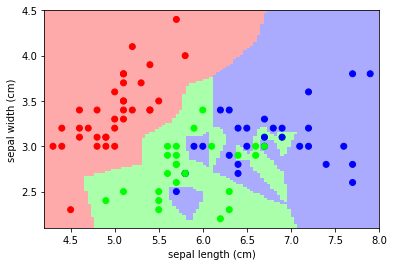

In [14]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()

#only take the first two features.
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)



x_min, x_max = X_train[:, 0].min() - .1, X_train[:, 0].max() + .1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

## 4. Validation
+ training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.
+ However, by partitioning the available data into three sets(train, test, validation), we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.
+ 

### When a Dataset is not enough => cross-validation

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)


0.9666666666666667